## Classification on CIFAR-10

This notebook builds a CNN to test classification on the CIFAR-1O dataset.

## 1. Load libs

In [4]:
import numpy as np
from keras.layers import Input, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD
from cifar_utils import plot_history, load_dataset, normalize_data

import matplotlib.pyplot as plt

%matplotlib inline

## 2. Loading dataset

In [2]:
Xtrain, ytrain, Xtest, ytest = load_dataset()
print("Xtrain shape: {}".format(Xtrain.shape))
print("ytrain shape: {}".format(ytrain.shape))
print("Xtest shape: {}".format(Xtest.shape))
print("yest shape: {}".format(ytest.shape))

Xtrain shape: (50000, 32, 32, 3)
ytrain shape: (50000, 10)
Xtest shape: (10000, 32, 32, 3)
yest shape: (10000, 10)


### 2.1 Plotting some of sample dataset

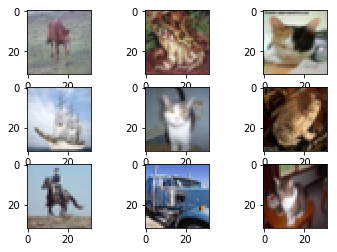

In [5]:
np.random.shuffle(Xtrain)

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(Xtrain[i])

plt.show()

In [6]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = normalize_data(trainX, trainY)
print("TRAINX MIN: {}, MAX: {}".format(trainX.min(), trainX.max()))
print("TEST MIN: {}, MAX: {}".format(testX.min(), testX.max()))

TRAINX MIN: 0.0, MAX: 1.0
TEST MIN: 0.0, MAX: 0.003921568859368563


## 3. Building model

We will be building baseline model using the VGG architecture, which involves stacking small convolutional layers with `3x3` filters followed by max pooling layer.

These layers form a block and blocks repeated with where nos of filters in each block increase as we increase depth of the network.

We will be building VGG-style models with the following configuration:

* `VGG 1 ( 1 VGG block )`

* `VGG 2 ( 2 VGG blocks)`

* `VGG 3 ( 3 VGG blocks )`

In [8]:
def vgg_block1():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)
    
    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)
    
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [6]:
def vgg_block2():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)
    
    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)
    
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [9]:
def vgg_block3():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)
    
    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)
    
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

## 4. Model evaluation

To obtain a baseline model from which we can iterate on, we evaluate each of the VGG models above by fitting on the training data in batch sizes of 64 for 100 epochs.

Each model is ran on an AWS GPU enabled EC2 instance.

In [ ]:
trainX, ytrain, testX, ytest = load_dataset()
Xtrain, Xtest = normalize_data(trainX, testX)
print(Xtrain.shape)
print(Xtest.shape)

model = vgg_block1()
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=64, validation_data=(Xtest, ytest))
loss, acc = model.evaluate(Xtest, ytest, verbose=1)

print("Loss: {:.3f}, Acc: {:.3f}".format((loss*100), (acc*100)))

plot_history(history)

### VGG Block 1
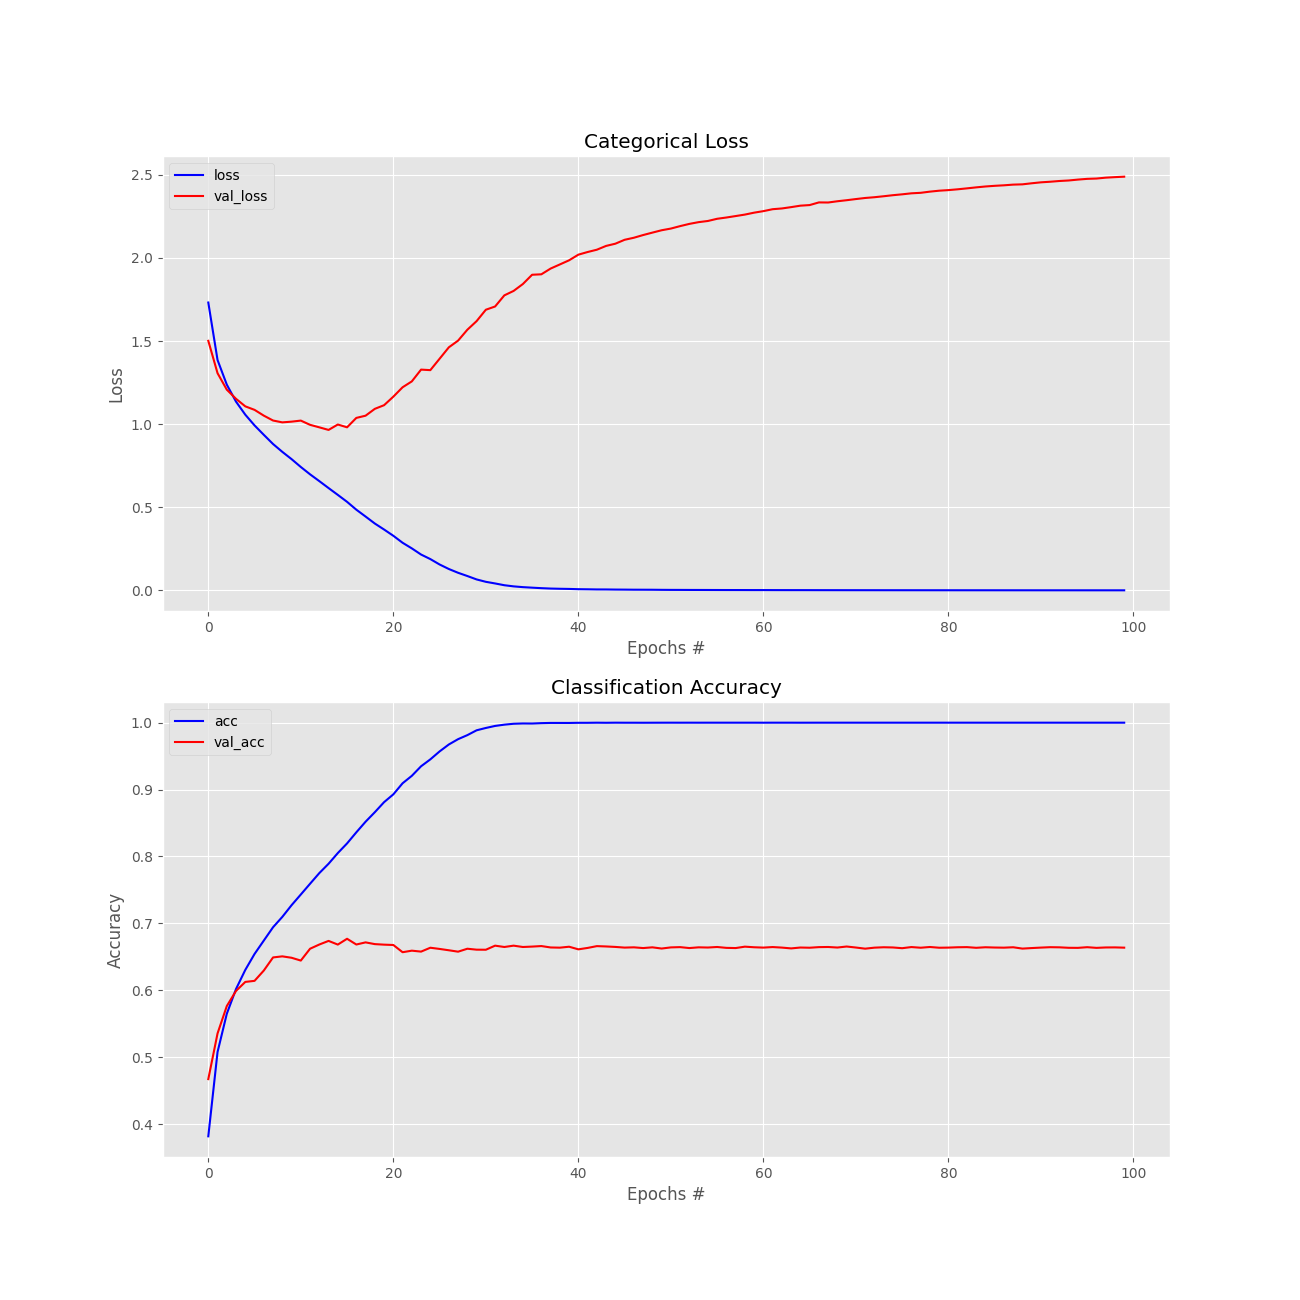

### VGG Block 2
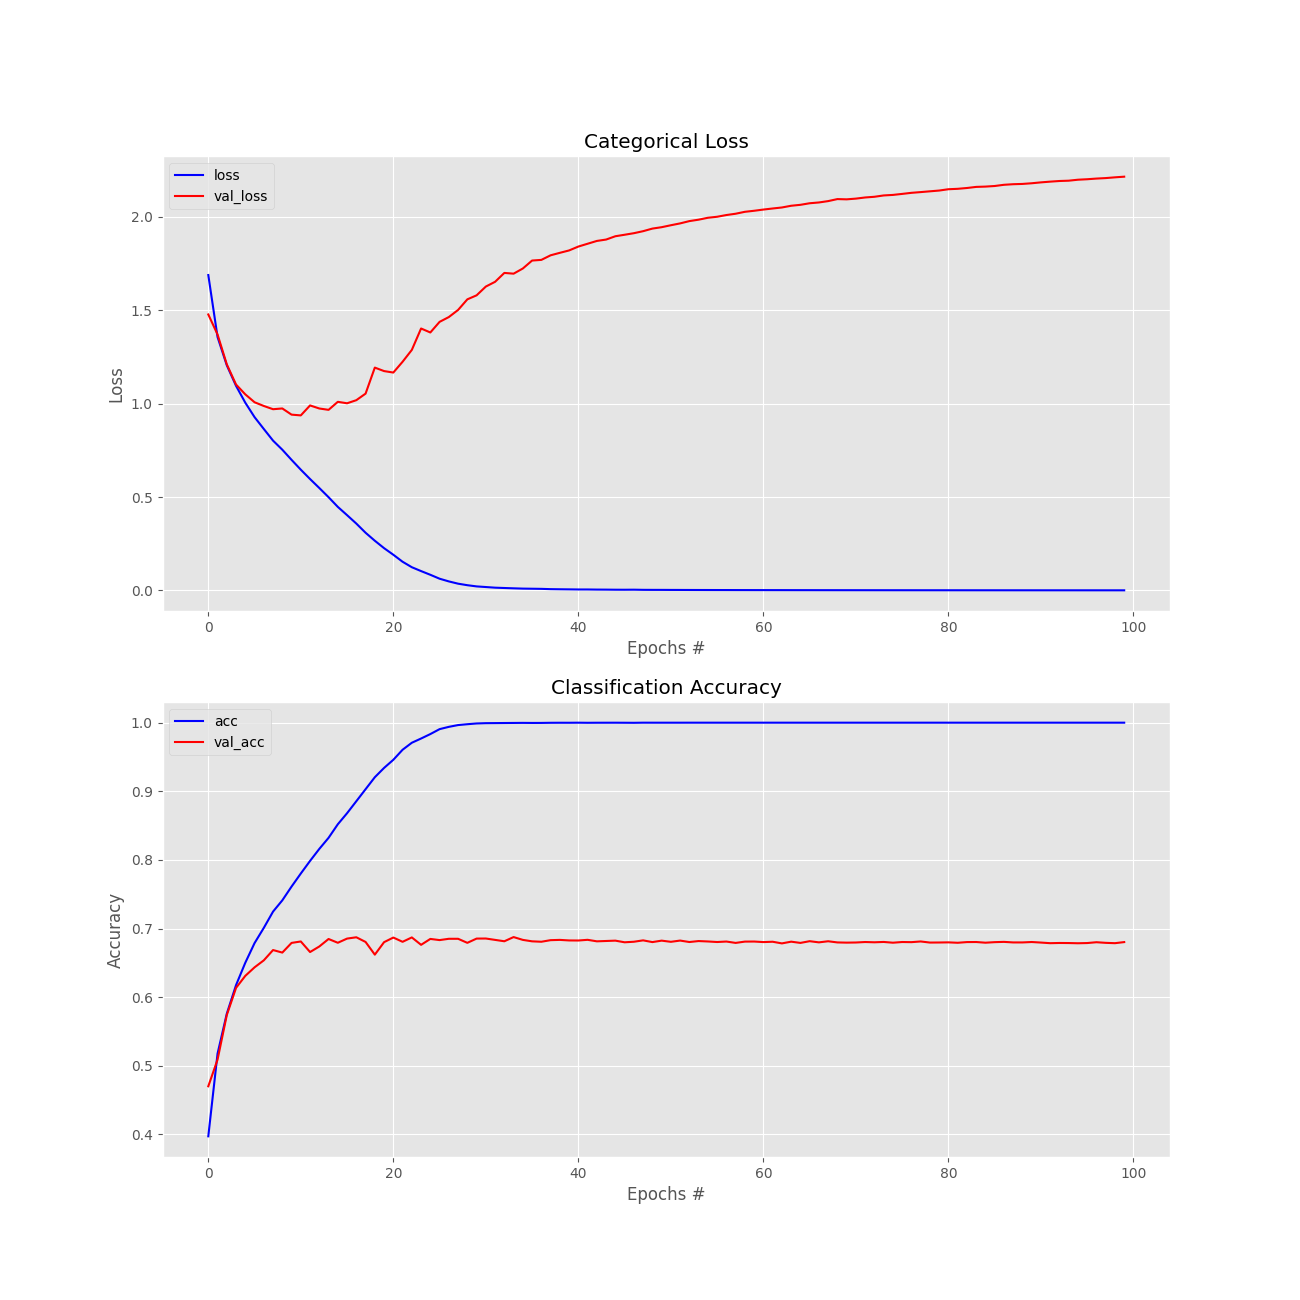

### VGG Block 3
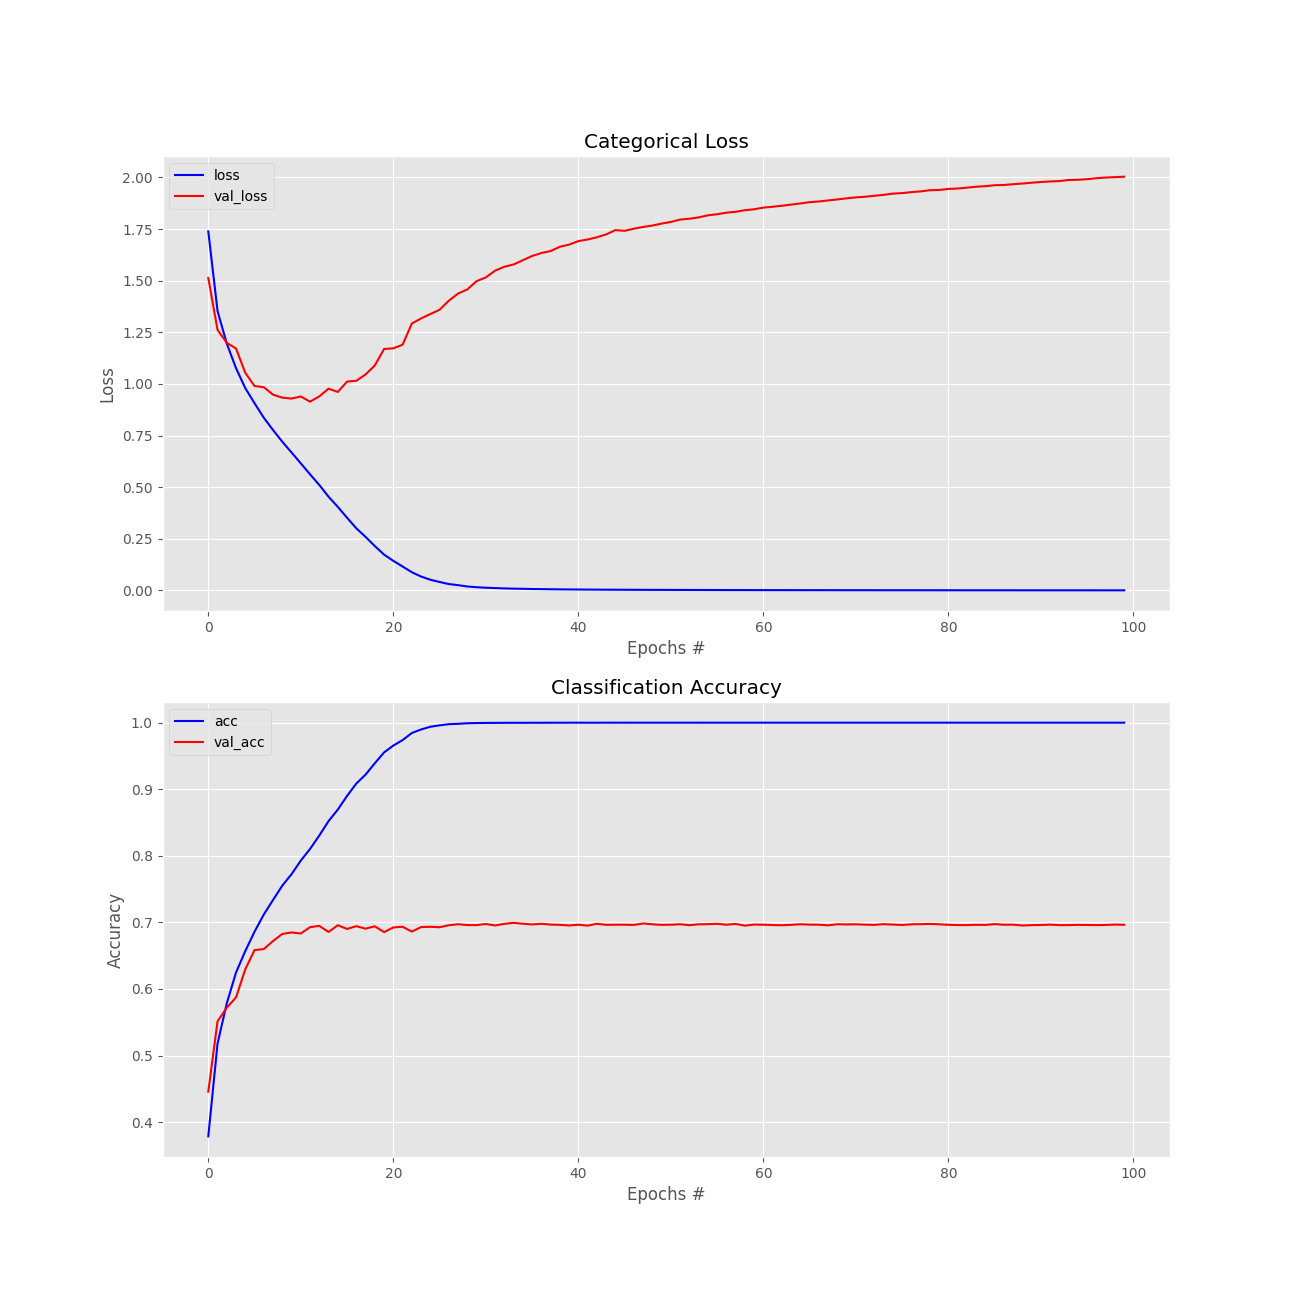

All the graphs above indicate strong overfitting as the validation loss is much higher than the training loss. It also shows that the overfitting occurs fairly rapidly, around the 15 epoch mark. 

We can utilize a selection of methods to reduce overfitting such as using dropout and data augmentation.

The individual loss/accuracies are as belows:
* `VGG 1 block Loss: 2.489, Acc: 66.370`
* `VGG 2 block Loss: 2.214, Acc: 68.030`
* `VGG 3 block Loss: 2.004, Acc: 69.640`

`VGG 3` block has the highest accuracy rate so we will use it as our baseline model to iterate on.

## Model improvement - Dropout

We will add dropout layers to the vgg block 3 model after max pooling layers and fully-connected layers. The dropout is set to a fixed rate of 20% (keep 80% of nodes).

The following model below incorporate these changes by adding Dropout layers after each MaxPooling and the final Activation layer. The dropout rate is fixed.

After running the below experiment for 200 epochs on AWS, we obtained the following accuracy:

`VGG 3 w/Dropout Acc: 72.930`

In [11]:
def vgg_block3_dropout():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dropout(0.2)(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)
    
    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)
    
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [12]:
model = vgg_block3_dropout()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 128)       0         
__________

### VGG 3 BLOCK w/Droput
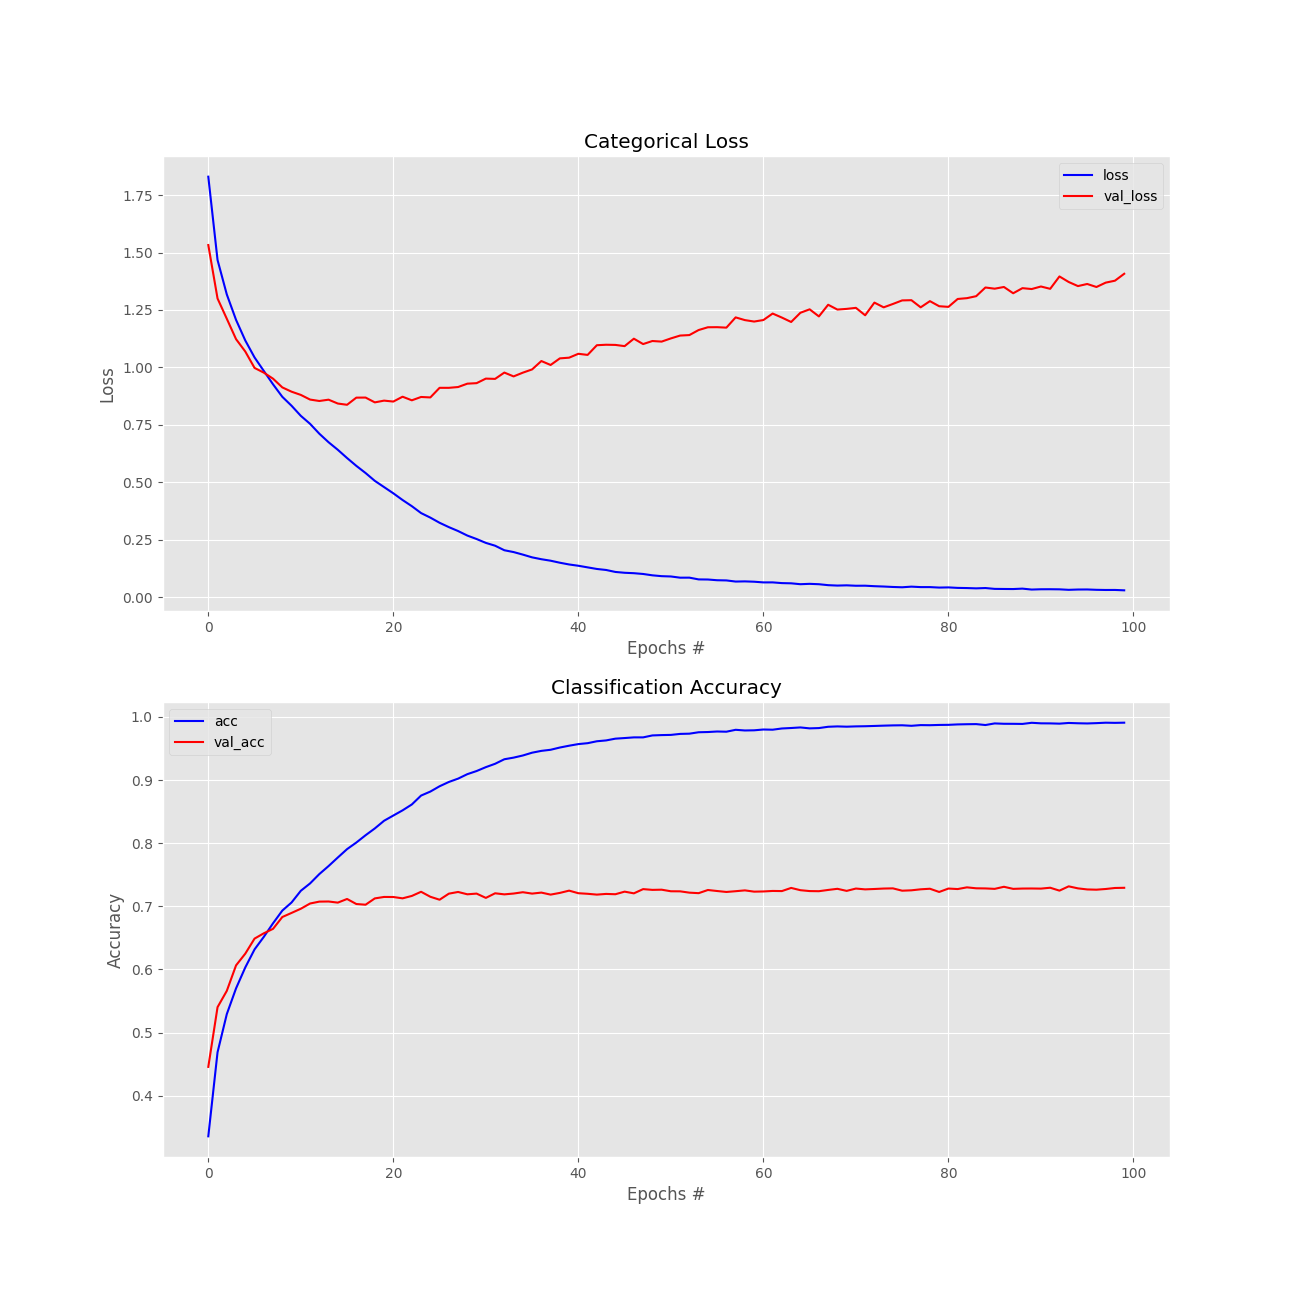

From the results above, we can see that the model is still overfitting with the validation loss much higher than the training loss.

## Model Improvement - Data Augmentation

Another approach is to use data augmentation to create various random transformations to the input images to allow the model to learn the same features in a generalized manner. Such transformations might include image flips and rotations. The process is known as Data Augmentation. 

We have to use the `ImageDataGenerator` from keras which can apply the transformations to the training images in batches when required. The transforms we will be applying includes shifts to the width and height of the images; and horizontal flips.

The model is trained for 100 epochs on AWS GPU.

The complete code is listed below:

In [ ]:
#!/usr/bin/env python

from keras.layers import Input, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from cifar_utils import plot_history, load_dataset, normalize_data

def vgg_block3_data_augmentation():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)

    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

    return model

trainX, trainY, testX, testY = load_dataset()
trainX, testX = normalize_data(trainX, testX)

print("VGG 3 Blocks with Data Augmentation")
model = vgg_block3_data_augmentation()
print(model.summary())

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)

history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY))

_, acc = model.evaluate(testX, testY, verbose=0)

print("VGG 3 w/Augmentation Acc: {:.3f}".format(acc*100))

plot_history(history, "vgg_block3_augmentation")

The model obtained an accuracy rate of `78.970%`, which is a slight improvement on using dropout alone but it is still showing signs of overfitting in the validation loss although the 2 error curves are showing signs of convergence.

### VGG 3 Block w/ Data Augmentation
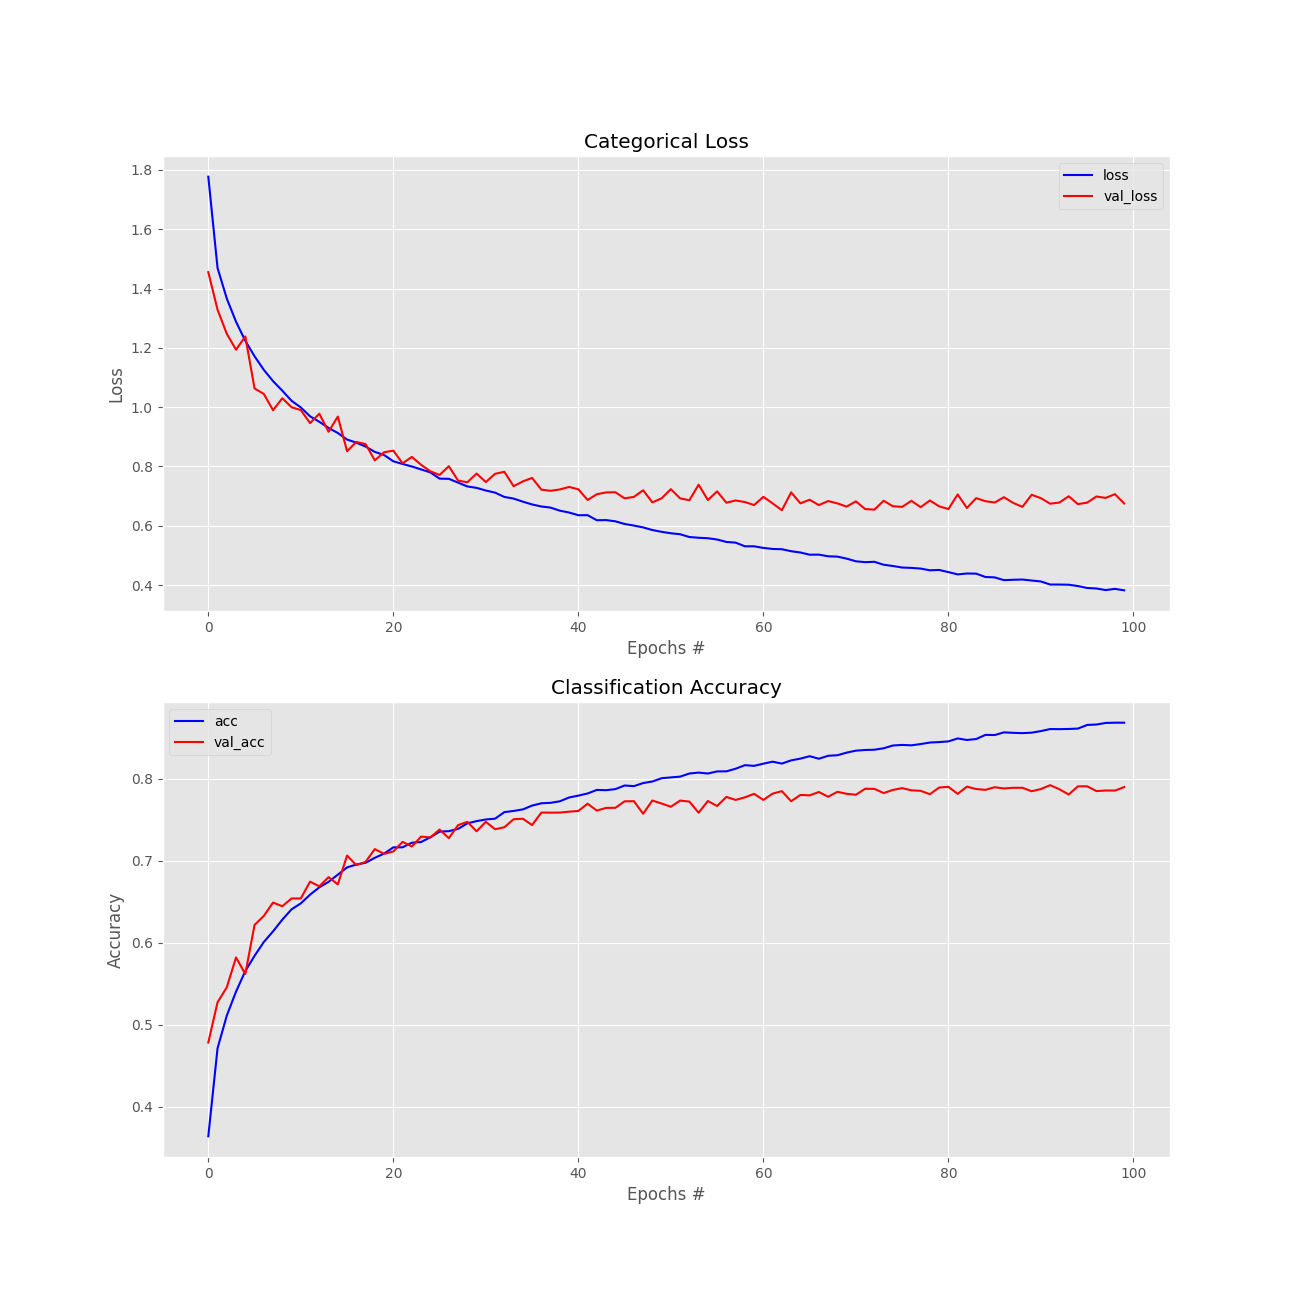

## Model Improvement - Dropout + Data Augmentation

We can combine the two approaches above and run an experiment on whether both approaches improve the overall performance.

We also double the number of training epochs to 200

The model's performance increase further to an accuracy rate of `81.460%`

The code listing below shows the model with both techniques combined:

In [ ]:
#!/usr/bin/env python

from keras.layers import Input, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from cifar_utils import plot_history, load_dataset, normalize_data

def vgg_block3_dropout_augmentation():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = Dropout(0.2)(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)

    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

    return model

trainX, trainY, testX, testY = load_dataset()
trainX, testX = normalize_data(trainX, testX)

print("VGG 3 Blocks with Droput + Data Augmentation")
model = vgg_block3_dropout_augmentation()
print(model.summary())

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)

history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY))

_, acc = model.evaluate(testX, testY, verbose=0)

print("VGG 3 w/Data+Augmentation Acc: {:.3f}".format(acc*100))

plot_history(history, "vgg_block3_dropout_augmentation")


## Model Improvement - Dropout, Data augmentation, BatchNormalization

We can further improve upon the results above by using a combination of the following techniques:

* Training for more epochs

* Adding BatchNormalization to normalize the previous layers' activations to speed up learning

* Add increasing dropout where earlier layers have lower dropout rates and deeper layers have higher dropout rates.

The model was deployed and trained on an AWS GPU.

The code listing below shows the changes made:

In [ ]:
#!/usr/bin/env python

from keras.layers import Input, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from cifar_utils import plot_history, load_dataset, normalize_data

def vgg_block3_dropout_augmentation_batchnorm():
    inputs = Input(shape=(32, 32, 3))
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = Conv2D(32, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.2)(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = Conv2D(64, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.3)(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(inputs)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = Conv2D(128, (3,3), kernel_initializer="he_uniform", padding="same")(X)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.4)(X)
    X = Flatten()(X)
    X = Dense(128, kernel_initializer="he_uniform")(X)
    X = Activation("relu")(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)
    X = Dense(10)(X)
    final_layer = Activation("softmax")(X)

    model = Model(inputs=inputs, outputs=final_layer)
    opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

    return model

trainX, trainY, testX, testY = load_dataset()
trainX, testX = normalize_data(trainX, testX)

print("VGG 3 Blocks with Droput + Data Augmentation + BatchNormalization")
model = vgg_block3_dropout_augmentation_batchnorm()
print(model.summary())

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)

history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY))

_, acc = model.evaluate(testX, testY, verbose=0)

model.save("final_model.model")

print("VGG 3 w/Data+Augmentation Acc: {:.3f}".format(acc*100))

plot_history(history, "vgg_block3_dropout_augmentation_batchnorm")


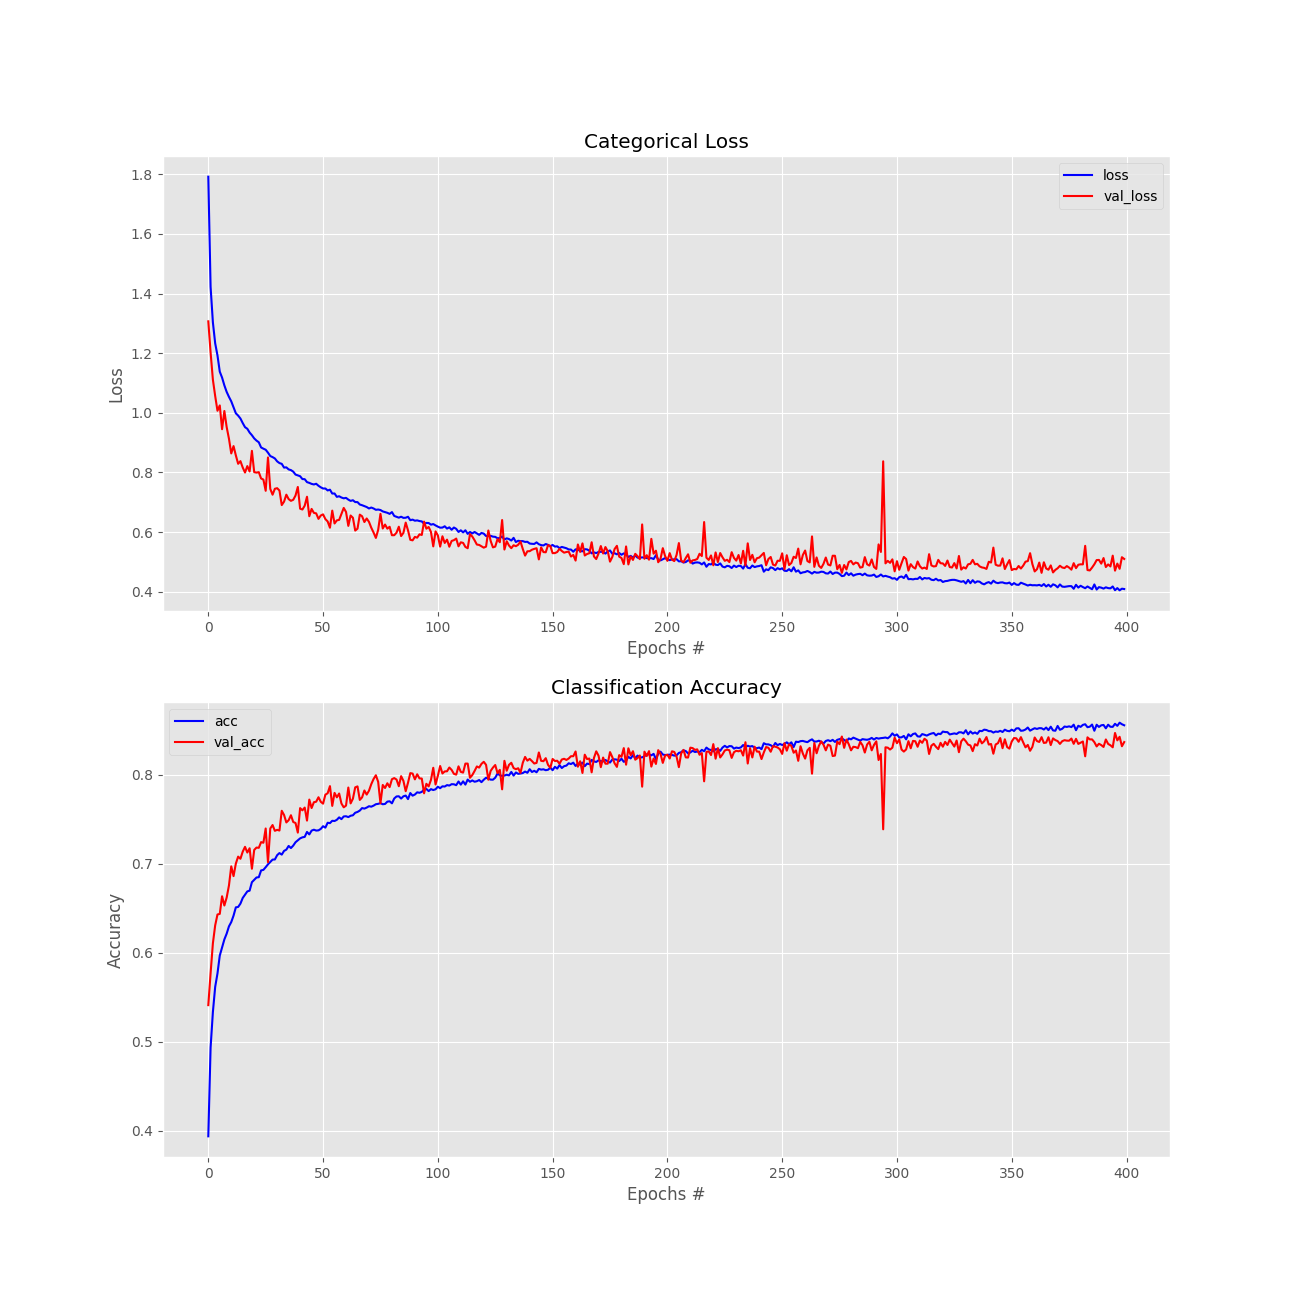

The model's performance has improved to `83.68%`.

The training curves also indicate a much better fit with both the training/validation loss converging. The slight gap / divergence between the loss indicate that perhaps more training cycles might help improve accuracy.

## Conclusion:

The following is a summary of the experiments above:

* `VGG w/Dropout: 72.93%`

* `VGG w/Data Augmentation: 78.97%`

* `VGG w/Data Augmentation+Droput: 81.46%`

* `VGG w/Data Augmentation+Dropout+BatchNorm: 83.68%`

As indicated by the last training curves, more improvements can still be made, for instance by using learning rate decay; using a different optimizer such as Adam.